<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/KUIS_2_ML_18_Najwa_A_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepocessing Data

## Import Library & Upload Dataset

In [203]:
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [204]:
# Mount Google Drive
drive.mount('/content/drive')

# Path menuju file di Google Drive
path = '/content/drive/MyDrive/Dataset/Dataset RGB Warna Daun label - Kuis2.xlsx'

all_sheets = pd.read_excel("/content/drive/MyDrive/Dataset/Dataset RGB Warna Daun label - Kuis2.xlsx", sheet_name=None)

for name, df in all_sheets.items():
    print(f"=== Sheet: {name} ===")
    print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Sheet: Label A ===
            Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0  Data RGB Warna Daun        NaN        NaN        NaN
1              Label A        NaN        NaN        NaN
2                   No          R          G          B
3                    1        151        149      106.4
4                    2        151        149     109.78
=== Sheet: Label B ===
  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0    Label B        NaN        NaN        NaN
1        NaN        NaN        NaN        NaN
2         No          R          G          B
3          1        156      153.8      123.3
4          2        156      153.8     130.06
=== Sheet: Label C ===
  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3
0    Label C        NaN        NaN        NaN
1        NaN        NaN        NaN        NaN
2         No          R          G          B
3     

## Menjadikan R, G, B sebagai fitur utama

In [205]:
# 1. AMBIL BARIS YANG BERISI HEADER SEBENARNYA (baris ke-2)
new_header = df.iloc[2]
df = df[3:]
df.columns = new_header

# 2. Hapus kolom yang tidak kamu butuhkan (misal: 'No')
if 'No' in df.columns:
    df = df.drop(columns=['No'])

# 3. Convert R,G,B ke tipe angka
df[['R','G','B']] = df[['R','G','B']].apply(pd.to_numeric, errors='coerce')

# 4. Tampilkan dataset final
print("\n=== Dataset Setelah Perbaikan ===")
display(df.head(10))


=== Dataset Setelah Perbaikan ===


2,R,G,B
3,132.0,129.8,89.50
4,132.0,129.8,69.22
5,134.0,144.2,72.60
6,134.0,129.8,72.60
7,134.0,129.8,72.60
8,134.0,129.8,99.64
9,134.0,129.8,86.12
10,132.0,132.2,72.60
11,132.0,132.2,72.60
12,132.0,129.8,119.92


## Data Imputation

In [206]:
# Cek jumlah missing values di tiap kolom
df.isnull().sum()

,0
2,
R,3
G,1
B,2


In [207]:
imputer = SimpleImputer(strategy='mean')

df[['R','G','B']] = imputer.fit_transform(df[['R','G','B']])

# cek jumlah missing values setelah melakukan data imputation
df.isnull().sum()

,0
2,
R,0
G,0
B,0


## Standarisasi

In [208]:
scaler = StandardScaler()

df[['R_std', 'G_std', 'B_std']] = scaler.fit_transform(df[['R','G','B']])

print("=== Dataset Setelah Standarisasi ===")
display(df.head())

=== Dataset Setelah Standarisasi ===


2,R,G,B,R_std,G_std,B_std
3,132.0,129.8,89.50,-1.374875,-1.823694,-1.075979
4,132.0,129.8,69.22,-1.374875,-1.823694,-2.157544
5,134.0,144.2,72.60,-1.191834,-0.439398,-1.977283
6,134.0,129.8,72.60,-1.191834,-1.823694,-1.977283
7,134.0,129.8,72.60,-1.191834,-1.823694,-1.977283


## Fitur Baru hasil kombinasi fitur lama

In [209]:
# Intensitas (kecerahan)
df["Intensity"] = (df["R"] + df["G"] + df["B"]) / 3

# Greenness
df["Greenness"] = df["G"] - df["R"]

# Excess Green (ExG)
df["ExG"] = 2*df["G"] - df["R"] - df["B"]

# Rasio warna
df["R_G"] = df["R"] / (df["G"] + 1e-6)
df["G_B"] = df["G"] / (df["B"] + 1e-6)
df["R_B"] = df["R"] / (df["B"] + 1e-6)

# NDI
df["NDI"] = (df["G"] - df["R"]) / (df["G"] + df["R"] + 1e-6)

# Jarak warna ke intensitas
I = df["Intensity"]
df["Color_Distance"] = np.sqrt((df["R"]-I)**2 + (df["G"]-I)**2 + (df["B"]-I)**2)

print("\n==== 5 Baris Dataset Setelah Tambah Fitur ====")
print(df.head())


==== 5 Baris Dataset Setelah Tambah Fitur ====
2      R      G      B     R_std     G_std     B_std   Intensity  Greenness  \
3  132.0  129.8  89.50 -1.374875 -1.823694 -1.075979  117.100000       -2.2   
4  132.0  129.8  69.22 -1.374875 -1.823694 -2.157544  110.340000       -2.2   
5  134.0  144.2  72.60 -1.191834 -0.439398 -1.977283  116.933333       10.2   
6  134.0  129.8  72.60 -1.191834 -1.823694 -1.977283  112.133333       -4.2   
7  134.0  129.8  72.60 -1.191834 -1.823694 -1.977283  112.133333       -4.2   

2    ExG       R_G       G_B       R_B       NDI  Color_Distance  
3  38.10  1.016949  1.450279  1.474860 -0.008403       33.838735  
4  58.38  1.016949  1.875181  1.906963 -0.008403       50.385530  
5  81.80  0.929265  1.986226  1.845730  0.036664       54.773960  
6  53.00  1.032357  1.787879  1.845730 -0.015921       48.509243  
7  53.00  1.032357  1.787879  1.845730 -0.015921       48.509243  


### Penjelasan Singkat Fitur

- **Intensity**: Rata-rata nilai R, G, B untuk mengukur kecerahan daun.  
- **Greenness**: Selisih G - R untuk melihat dominasi hijau dan indikasi daun menguning.  
- **ExG (Excess Green)**: Menonjolkan komponen hijau sehingga membantu mendeteksi vegetasi dan kesehatan daun.  
- **Rasio Warna (R/G, G/B, R/B)**: Perbandingan antar kanal warna untuk melihat dominasi dan perubahan warna halus.  
- **NDI**: Rasio (G − R) / (G + R) yang stabil terhadap cahaya untuk menilai kehijauan daun.  
- **Color Distance**: Jarak RGB terhadap rata-rata (intensity) untuk mendeteksi variasi warna dan bercak pada daun.

# Regresi

Linear Regression R²: -0.004408805650553571


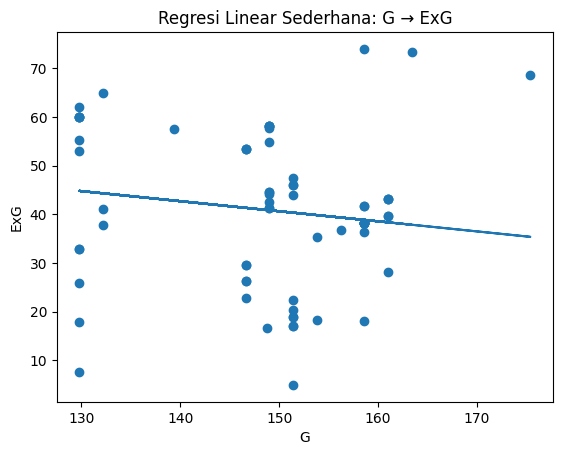

Multiple Regression R²: 1.0
MSE: 2.3111871498741822e-27

Koefisien Regression:
R: -1.0000000000000009
G: 2.0
B: -1.0000000000000004
Intercept: 2.2737367544323206e-13
Polynomial Regression (Degree 2) R²: 1.0


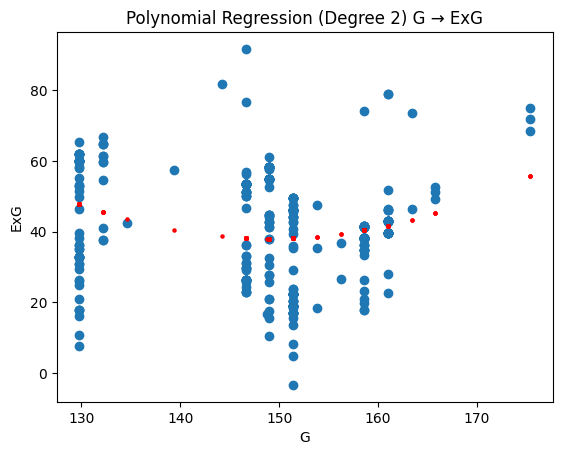

In [210]:
# Pastikan ExG sudah ada
df["ExG"] = 2*df["G"] - df["R"] - df["B"]

# Variabel independen (fitur utama)
X = df[["R", "G", "B"]]

# Variabel dependen (target)
Y = df["ExG"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Regresi linear sederhana (misal menggunakan G)
X_single = df[["G"]]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, Y, test_size=0.2, random_state=42)

model_lin = LinearRegression()
model_lin.fit(X_train_s, y_train_s)

# Prediksi
pred_lin = model_lin.predict(X_test_s)

print("Linear Regression R²:", r2_score(y_test_s, pred_lin))

plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, pred_lin)
plt.xlabel("G")
plt.ylabel("ExG")
plt.title("Regresi Linear Sederhana: G → ExG")
plt.show()

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

pred_multi = model_multi.predict(X_test)

print("Multiple Regression R²:", r2_score(y_test, pred_multi))
print("MSE:", mean_squared_error(y_test, pred_multi))

print("\nKoefisien Regression:")
print("R:", model_multi.coef_[0])
print("G:", model_multi.coef_[1])
print("B:", model_multi.coef_[2])
print("Intercept:", model_multi.intercept_)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)

pred_poly = model_poly.predict(X_test_p)

print("Polynomial Regression (Degree 2) R²:", r2_score(y_test_p, pred_poly))

X_G = df[["G"]]
poly_G = PolynomialFeatures(degree=2)
X_G_poly = poly_G.fit_transform(X_G)

model_poly_G = LinearRegression()
model_poly_G.fit(X_G_poly, Y)

# Plot
plt.scatter(df["G"], Y)
plt.scatter(df["G"], model_poly_G.predict(X_G_poly), color="red", s=5)
plt.xlabel("G")
plt.ylabel("ExG")
plt.title("Polynomial Regression (Degree 2) G → ExG")
plt.show()

# Klasifikasi

## Membuat label kelas dan menentukan fitur

In [211]:
# LABEL Y dari ExG menjadi 3 kelas
df["Y"] = pd.qcut(df["ExG"], q=3, labels=["Low", "Medium", "High"])

df[["ExG", "Y"]].head()

X = df[["R", "G", "B"]]   # memakai 3 fitur dasar
Y = df["Y"]

X.head(), Y.head()

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## Naive Bayes

In [212]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_pred = nb.predict(X_test)

print("\n=== NAIVE BAYES ===")
print("Accuracy:", accuracy_score(Y_test, nb_pred))
print(confusion_matrix(Y_test, nb_pred))
print(classification_report(Y_test, nb_pred))


=== NAIVE BAYES ===
Accuracy: 0.8055555555555556
[[19  0  3]
 [ 4 15  4]
 [ 3  0 24]]
              precision    recall  f1-score   support

        High       0.73      0.86      0.79        22
         Low       1.00      0.65      0.79        23
      Medium       0.77      0.89      0.83        27

    accuracy                           0.81        72
   macro avg       0.83      0.80      0.80        72
weighted avg       0.83      0.81      0.80        72



## SVM RBF

In [213]:
# 4. NORMALISASI UNTUK SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train_scaled, Y_train)
rbf_pred = svm_rbf.predict(X_test_scaled)

print("\n=== SVM (RBF) ===")
print("Accuracy:", accuracy_score(Y_test, rbf_pred))
print(confusion_matrix(Y_test, rbf_pred))
print(classification_report(Y_test, rbf_pred))


=== SVM (RBF) ===
Accuracy: 0.9166666666666666
[[20  1  1]
 [ 0 21  2]
 [ 0  2 25]]
              precision    recall  f1-score   support

        High       1.00      0.91      0.95        22
         Low       0.88      0.91      0.89        23
      Medium       0.89      0.93      0.91        27

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72



## SVM SIGMOID

In [214]:
svm_sigmoid = SVC(kernel="sigmoid")
svm_sigmoid.fit(X_train_scaled, Y_train)
sig_pred = svm_sigmoid.predict(X_test_scaled)

print("\n=== SVM (SIGMOID) ===")
print("Accuracy:", accuracy_score(Y_test, sig_pred))
print(confusion_matrix(Y_test, sig_pred))
print(classification_report(Y_test, sig_pred))


=== SVM (SIGMOID) ===
Accuracy: 0.8055555555555556
[[19  0  3]
 [ 5 16  2]
 [ 4  0 23]]
              precision    recall  f1-score   support

        High       0.68      0.86      0.76        22
         Low       1.00      0.70      0.82        23
      Medium       0.82      0.85      0.84        27

    accuracy                           0.81        72
   macro avg       0.83      0.80      0.81        72
weighted avg       0.83      0.81      0.81        72



## Fungsi run model & model yang dipakai

In [221]:
# FUNGSI RUN MODEL
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    return {
        "train_acc": accuracy_score(y_train, pred_train),
        "test_acc": accuracy_score(y_test, pred_test),
        "conf_matrix": confusion_matrix(y_test, pred_test),
        "report": classification_report(y_test, pred_test, zero_division=0)
    }

# MODEL YANG DIPAKAI
models = {
    "Naive Bayes": GaussianNB(),
    "SVM RBF": SVC(kernel='rbf'),
    "SVM Sigmoid": SVC(kernel='sigmoid')
}

## Evaluasi sebelum dan sesudah standarisasi

In [222]:
# EVALUASI SEBELUM STANDARDISASI
results_before = {}
for name, model in models.items():
    results_before[name] = run_model(model, X_train, X_test, Y_train, Y_test)

# SESUDAH STANDARDISASI
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

results_after = {}
for name, model in models.items():
    results_after[name] = run_model(model, X_train_std, X_test_std, Y_train, Y_test)

## Tabel perbandingan akurasi

In [223]:
comparison = pd.DataFrame({
    "Model": list(models.keys()),
    "Train Sebelum": [results_before[m]["train_acc"] for m in models],
    "Test Sebelum": [results_before[m]["test_acc"] for m in models],
    "Train Sesudah": [results_after[m]["train_acc"] for m in models],
    "Test Sesudah": [results_after[m]["test_acc"] for m in models],
})

print("\n============== PERBANDINGAN AKURASI ==============\n")
print(comparison.to_string(index=False))


============== PERBANDINGAN AKURASI ==============

      Model  Train Sebelum  Test Sebelum  Train Sesudah  Test Sesudah
Naive Bayes       0.789474      0.805556       0.789474      0.805556
    SVM RBF       0.880702      0.902778       0.912281      0.916667
SVM Sigmoid       0.340351      0.305556       0.828070      0.805556


## Heatmap confusion matrix


MODEL : Naive Bayes

----- SEBELUM STANDARDISASI -----

Confusion Matrix:
[[19  0  3]
 [ 4 15  4]
 [ 3  0 24]]

Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.86      0.79        22
         Low       1.00      0.65      0.79        23
      Medium       0.77      0.89      0.83        27

    accuracy                           0.81        72
   macro avg       0.83      0.80      0.80        72
weighted avg       0.83      0.81      0.80        72



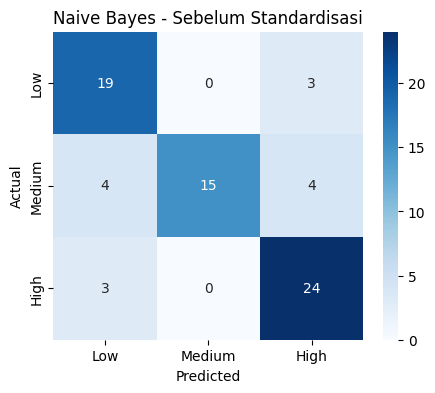


----- SESUDAH STANDARDISASI -----

Confusion Matrix:
[[19  0  3]
 [ 4 15  4]
 [ 3  0 24]]

Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.86      0.79        22
         Low       1.00      0.65      0.79        23
      Medium       0.77      0.89      0.83        27

    accuracy                           0.81        72
   macro avg       0.83      0.80      0.80        72
weighted avg       0.83      0.81      0.80        72



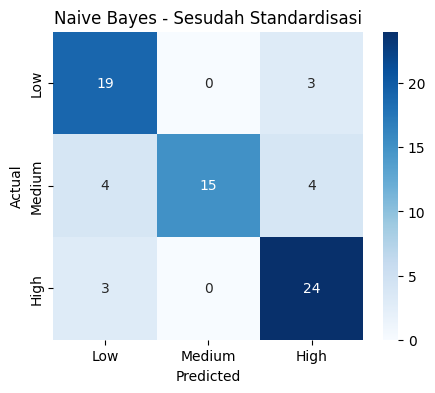


MODEL : SVM RBF

----- SEBELUM STANDARDISASI -----

Confusion Matrix:
[[20  0  2]
 [ 0 21  2]
 [ 1  2 24]]

Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.91      0.93        22
         Low       0.91      0.91      0.91        23
      Medium       0.86      0.89      0.87        27

    accuracy                           0.90        72
   macro avg       0.91      0.90      0.91        72
weighted avg       0.90      0.90      0.90        72



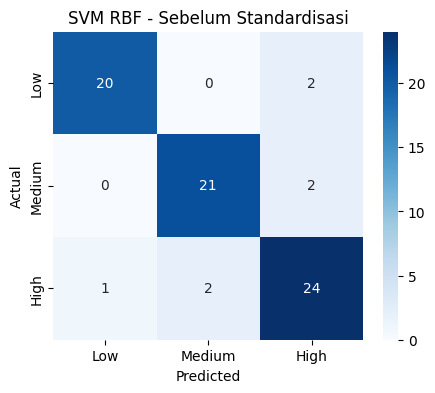


----- SESUDAH STANDARDISASI -----

Confusion Matrix:
[[20  1  1]
 [ 0 21  2]
 [ 0  2 25]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.91      0.95        22
         Low       0.88      0.91      0.89        23
      Medium       0.89      0.93      0.91        27

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72



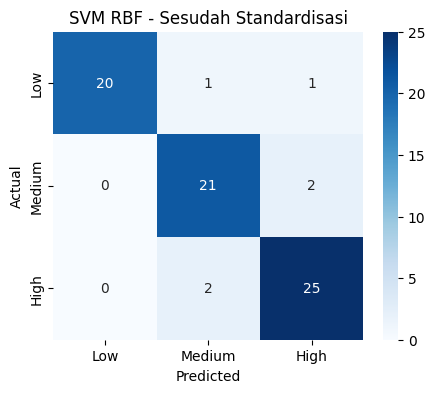


MODEL : SVM Sigmoid

----- SEBELUM STANDARDISASI -----

Confusion Matrix:
[[22  0  0]
 [23  0  0]
 [27  0  0]]

Classification Report:
              precision    recall  f1-score   support

        High       0.31      1.00      0.47        22
         Low       0.00      0.00      0.00        23
      Medium       0.00      0.00      0.00        27

    accuracy                           0.31        72
   macro avg       0.10      0.33      0.16        72
weighted avg       0.09      0.31      0.14        72



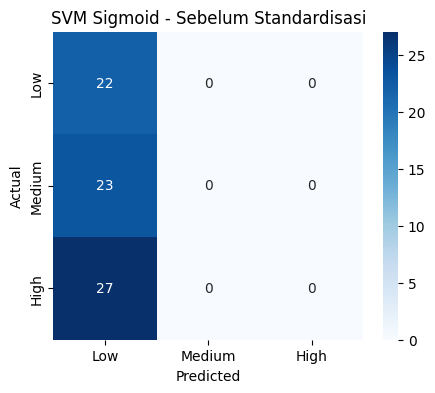


----- SESUDAH STANDARDISASI -----

Confusion Matrix:
[[19  0  3]
 [ 5 16  2]
 [ 4  0 23]]

Classification Report:
              precision    recall  f1-score   support

        High       0.68      0.86      0.76        22
         Low       1.00      0.70      0.82        23
      Medium       0.82      0.85      0.84        27

    accuracy                           0.81        72
   macro avg       0.83      0.80      0.81        72
weighted avg       0.83      0.81      0.81        72



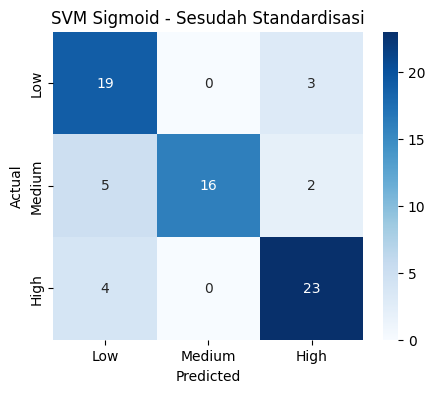

In [225]:
def plot_confusion(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"])
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

for name in models:
    print("\n===================================================")
    print(f"MODEL : {name}")
    print("===================================================\n")

    # BEFORE
    print("----- SEBELUM STANDARDISASI -----\n")
    print("Confusion Matrix:")
    print(results_before[name]["conf_matrix"])
    print("\nClassification Report:")
    print(results_before[name]["report"])

    plot_confusion(results_before[name]["conf_matrix"], f"{name} - Sebelum Standardisasi")

    # AFTER
    print("\n----- SESUDAH STANDARDISASI -----\n")
    print("Confusion Matrix:")
    print(results_after[name]["conf_matrix"])
    print("\nClassification Report:")
    print(results_after[name]["report"])

    plot_confusion(results_after[name]["conf_matrix"], f"{name} - Sesudah Standardisasi")

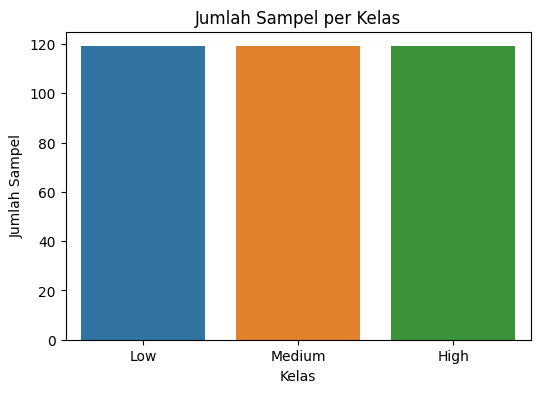

In [216]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Y', hue='Y', legend=False)

plt.title("Jumlah Sampel per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.show()

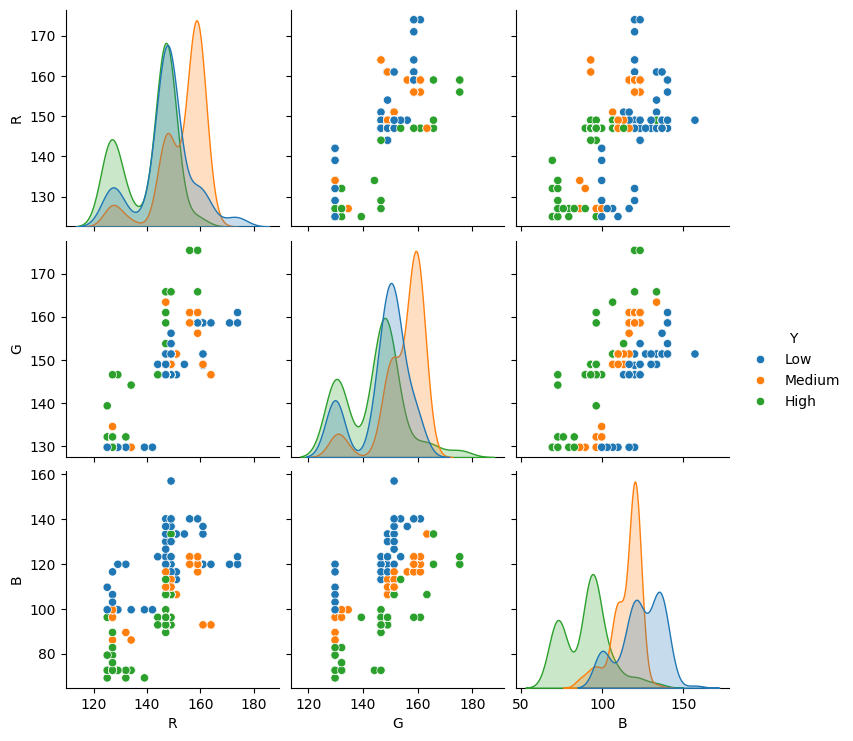

In [217]:
sns.pairplot(df[["R", "G", "B", "Y"]], hue="Y", diag_kind="kde")
plt.show()

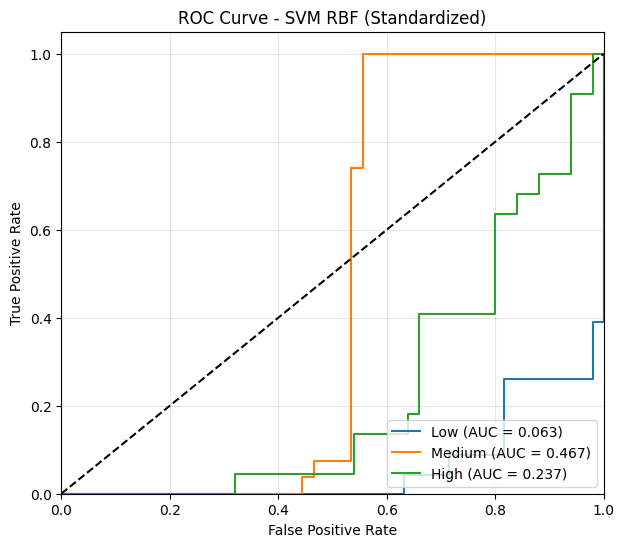

In [218]:
model = SVC(kernel='rbf', probability=True)

plot_roc_multiclass(model, X_train_std, X_test_std, Y_train, Y_test,
                    title="ROC Curve - SVM RBF (Standardized)")

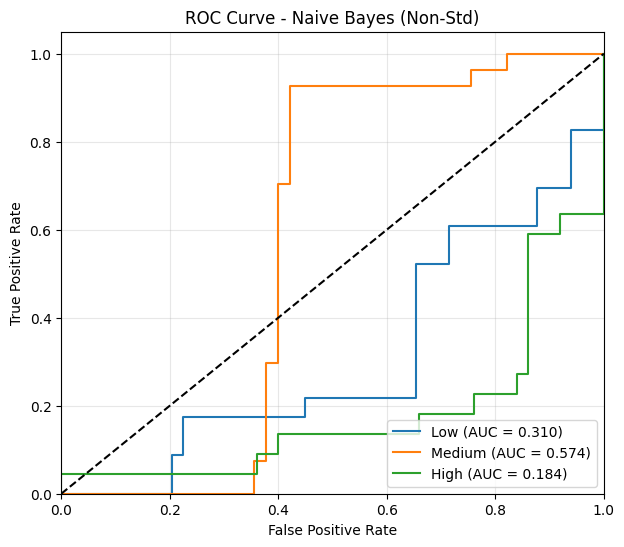

In [219]:
model = GaussianNB()

plot_roc_multiclass(model, X_train, X_test, Y_train, Y_test,
                    title="ROC Curve - Naive Bayes (Non-Std)")

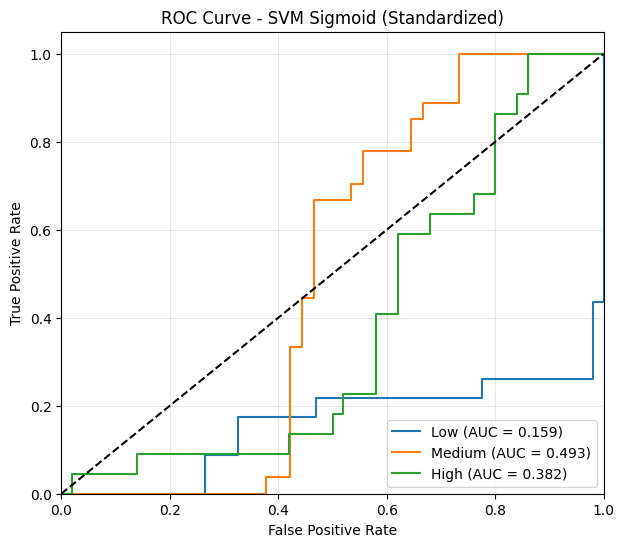

In [220]:
model = SVC(kernel='sigmoid', probability=True)

plot_roc_multiclass(
    model,
    X_train_std,   # wajib pakai data standar!
    X_test_std,
    Y_train,
    Y_test,
    title="ROC Curve - SVM Sigmoid (Standardized)"
)

# https://colab.research.google.com/drive/1P5Qg5BfkVR7vagbhaAUF6IQP5b7WOqsv?usp=sharing